# Part 2 - a national and more detailed analysis of indicators of diabetes

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
dia= pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
dia.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


## Data Cleaning

In [71]:
# Check for empty cells and if data types are correct for the respective columns
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [16]:
# set reponse as binomal 
# Since 'Diabetes_012' ==1 is pre-diabetes, we need to remove them
index1 = dia[ (dia['Diabetes_012'] ==1)].index
dia.drop(index1 , inplace=True)
dia['Diabetes_012'] = dia['Diabetes_012'].replace(2,1)
df = dia

Blood sugar levels that are higher than normal but not yet high enough to be diagnosed as type 2 diabetes are considered to have pre-diabetes. Therefore, We remove the response 'pre-diabetes' which is 1. We only want to focus on diabetes and No-diabetes and we set our response as binomal. ( diabetes = 1 and No-diabetes = 0)

The Final dataset:

In [17]:
#transform data as int 
df['Diabetes_012'] = df['Diabetes_012'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## Data visualization

/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


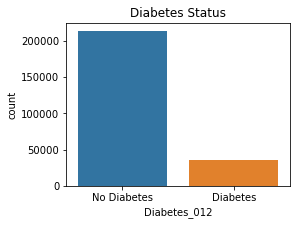

In [18]:
df1 = df.copy()
df1.Diabetes_012[df1['Diabetes_012'] == 0] = 'No Diabetes'
df1.Diabetes_012[df1['Diabetes_012'] == 1] = 'Diabetes'
plt.figure(figsize = (4,3))
sns.countplot(df1["Diabetes_012"])
plt.title("Diabetes Status")
plt.show()

<AxesSubplot:>

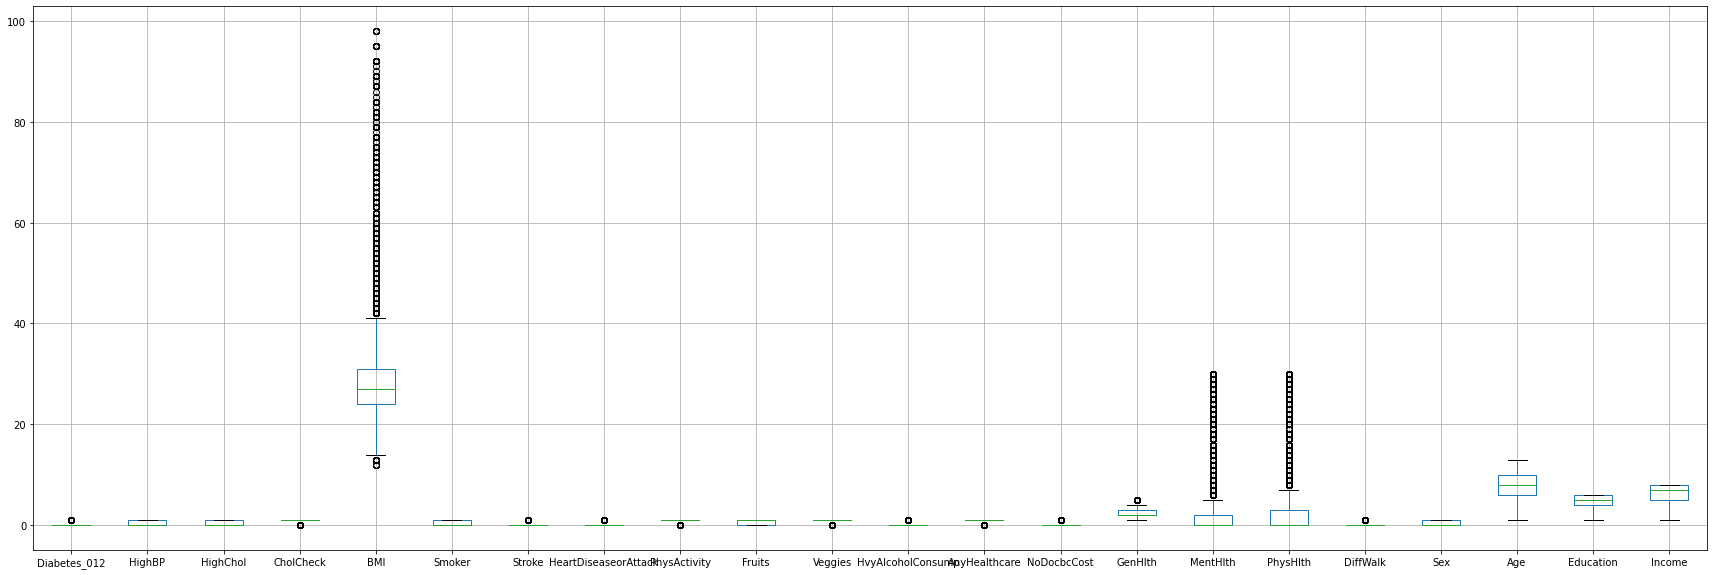

In [19]:
# Use a boxplot to detect any outliers
dia.boxplot(figsize=(30,10), fontsize=10) 

## 1. Methodology

In [20]:
X = df.iloc[:,1:22]  # independent columns - features
y = df.iloc[:,0]    # target column - Diabetes_012

In [21]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
# Split these data into training and testing datasets
#70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

In [22]:
# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)
# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


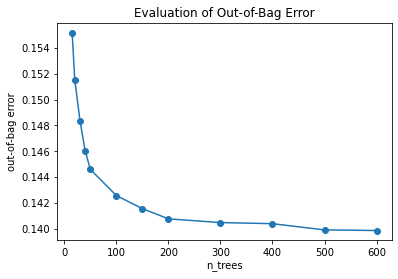

In [23]:
'''
The poressing is trying to check the best amount of the tree that has smaller out-of-bag error
The out-of-bag error appeared to stabilize around 500 trees.
'''
# Initialise the random forest estimator
# Set 'warm_start=true' so that more trees are added to the existing model each iteration
RF = RandomForestClassifier(oob_score=True, random_state=1, 
                            warm_start=True, n_jobs=-1) 
oob_list = list()
# Iterate through all of the possibilities for the number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 600]:
    RF.set_params(n_estimators=n_trees)  # Set number of trees
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_ # Obtain the oob error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
    
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error',
      title='Evaluation of Out-of-Bag Error');

In [265]:
# Create the model with 500 trees
forest = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1)
# Fit training data and training labels to forest
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

In [266]:
n_nodes = []
max_depths = []
for ind_tree in forest .estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)   
print(f'Random Forest has an average number of nodes {int(np.mean(n_nodes))} with an average maximum depth of {int(np.mean(max_depths))}.')
print(f'Model Accuracy for train data: {forest.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {forest.score(X_test, y_test)}')


Random Forest has an average number of nodes 60694 with an average maximum depth of 38.
Model Accuracy for train data: 0.9947858707997292
Model Accuracy for test data: 0.8586361507060162


From the above, all decision trees in random forests have many nodes and are very deep. Individual decision trees may overfit certain subsets of the training data, but using random forests gave slightly better accuracy ratings on the test data.

### 1.1 Check Feature importance

In [267]:
#defining of feature
feature = pd.Series(forest.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature)

BMI                     0.184041
Age                     0.121174
Income                  0.097223
PhysHlth                0.082688
GenHlth                 0.073130
Education               0.068828
MentHlth                0.062810
HighBP                  0.044329
Smoker                  0.032852
Fruits                  0.032796
HighChol                0.028009
Sex                     0.028005
Veggies                 0.026243
PhysActivity            0.025945
DiffWalk                0.025143
HeartDiseaseorAttack    0.019681
NoDocbcCost             0.014851
Stroke                  0.012359
AnyHealthcare           0.008349
HvyAlcoholConsump       0.007942
CholCheck               0.003601
dtype: float64


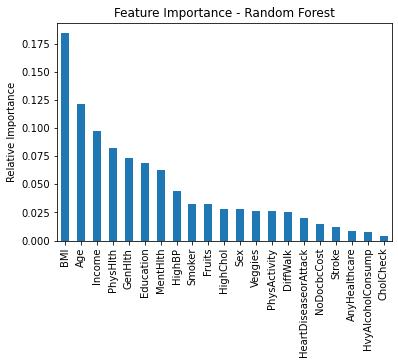

In [268]:
feature_imp = pd.Series(forest.feature_importances_, 
                        index=X.columns).sort_values(ascending=False)
 
 
ax = feature_imp.plot(kind='bar')
ax.set(title='Feature Importance - Random Forest',
       ylabel='Relative Importance');

In [269]:
# Predict target variables (ie. labels) for each classifer 
rf_classifier_name = ["Random Forest"]
rf_predicted_labels = forest.predict(X_test)
 
print("Classification Report for ",rf_classifier_name, " :\n ",
      metrics.classification_report(y_test, rf_predicted_labels))

Classification Report for  ['Random Forest']  :
                precision    recall  f1-score   support

           0       0.88      0.97      0.92     64064
           1       0.51      0.20      0.28     10651

    accuracy                           0.86     74715
   macro avg       0.69      0.58      0.60     74715
weighted avg       0.83      0.86      0.83     74715



[[62075  1989]
 [ 8573  2078]]


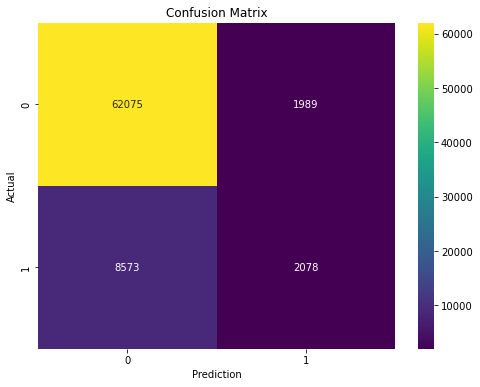

In [271]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, rf_predicted_labels)
print(matrix)
skplt.metrics.plot_confusion_matrix(y_test, rf_predicted_labels, normalize=True)
plt.show()
#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

Tpye I error is 0.03.(false positives: predicted the person has diabetes but actually do not have diabete) 
Type II error is 0.81. (false negative: predicted the person don't diabetes but actually do have diabete)

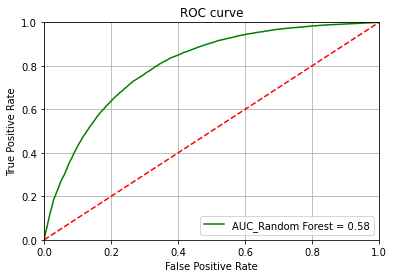

In [274]:
rf = forest.fit(X_train, y_train.values.ravel()) 
rf_predicted_label_r = rf.predict_proba(X_test)
ig, axList = plt.subplots(ncols=1)
fig.set_size_inches(21,6)
ax = axList
def plot_auc(y, probs):
    fpr, tpr, threshold = roc_curve(y, probs[:,1])
    auc = roc_auc_score(y_test, rf_predicted_labels)
    ax.plot(fpr, tpr, color = 'green', label = 'AUC_Random Forest = %0.2f' % auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.legend(loc = 'lower right')
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[0, 1], ylim=[0, 1],
           title='ROC curve') 
    
plot_auc(y_test, rf_predicted_label_r);
ax.grid(True)

### 1.2 Optimization our model  

In [24]:
# To get better model, we have to balance people have diabetes and don't have diabetes
df_0 = df[df.Diabetes_012==0]
df_1 = df[df.Diabetes_012==1]
 
# Upsample people have diabetes data
df_1_sample = resample(df_1,     replace=True,     # sample with replacement
                                 n_samples=213703,  # to match majority class
                                 random_state=1)   # reproducible results
 
# Combine diabetes with No diabetes
df_upsampled = pd.concat([df_0, df_1_sample])
# Display new diabetes counts
df_upsampled.Diabetes_012.value_counts()

0    213703
1    213703
Name: Diabetes_012, dtype: int64

In [25]:
X = df_upsampled.iloc[:,1:22]  # independent columns - features
y = df_upsampled.iloc[:,0]    # target column - Diabetes_012

In [26]:
X['BMI'] = np.log(X['BMI']) #transform BMI using log
X = X.drop(['PhysHlth','MentHlth'], axis=1) # drop 'PhysHlth','MentHlth' that are not important in our model
X

/var/folders/xk/bzswhdp94nzc63thcm13886w0000gn/T/ipykernel_18393/1595664260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BMI'] = np.log(X['BMI']) #transform BMI using log


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,3.688879,1,0,0,0,0,1,0,1,0,5,1,0,9,4,3
1,0,0,0,3.218876,1,0,0,1,0,0,0,0,1,3,0,0,7,6,1
2,1,1,1,3.332205,0,0,0,0,1,0,0,1,1,5,1,0,9,4,8
3,1,0,1,3.295837,0,0,0,1,1,1,0,1,0,2,0,0,11,3,6
4,1,1,1,3.178054,0,0,0,1,1,1,0,1,0,2,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242200,1,1,1,3.465736,1,0,0,1,1,1,0,1,0,3,0,1,10,6,8
93802,0,0,1,3.091042,0,0,0,1,1,1,0,1,0,3,0,0,6,6,8
3311,1,1,1,3.637586,0,0,0,0,1,1,0,1,1,5,0,0,7,4,3
207646,1,0,1,3.806662,1,0,0,0,1,1,0,1,0,3,0,1,10,6,8


In [28]:
# Split these data into training and testing datasets
#70% training and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)
# Initialise the random forest estimator
# Set 'warm_start=true' so that more trees are added to the existing model each iteration
RF = RandomForestClassifier(oob_score=True, random_state=1, 
                            warm_start=True, n_jobs=-1)
 
# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)
 

# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)  

/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


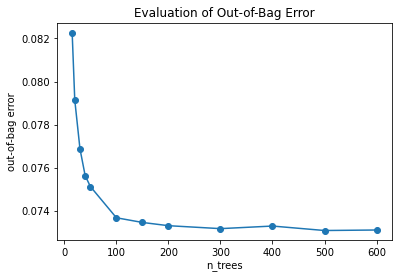

In [29]:
oob_list = list()
 
 
# Iterate through all of the possibilities for the number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400, 500, 600]:
    RF.set_params(n_estimators=n_trees)  # Set number of trees
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_ # Obtain the oob error
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))
 
 
rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')
 
 
ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error',
      title='Evaluation of Out-of-Bag Error');

In [30]:
# Create the model with 300 trees
forest = RandomForestClassifier(n_estimators=300, random_state=1, n_jobs=-1)
 
 
# Fit training data and training labels to forest
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=1)

In [33]:
n_nodes = []
max_depths = []
for ind_tree in forest .estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Random Forest has an average number of nodes {int(np.mean(n_nodes))} with an average maximum depth of {int(np.mean(max_depths))}.') 
print(f'Model Accuracy for train data: {forest.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {forest.score(X_test, y_test)}')


Random Forest has an average number of nodes 98399 with an average maximum depth of 35.
Model Accuracy for train data: 0.9854036312102251
Model Accuracy for test data: 0.9270016065885729


In [35]:
#defining of feature
feature = pd.Series(forest.feature_importances_, index = X.columns).sort_values(ascending = False)
print(feature)

BMI                     0.205815
Age                     0.148702
GenHlth                 0.115439
Income                  0.100602
HighBP                  0.081269
Education               0.069241
HighChol                0.042667
Fruits                  0.031469
Smoker                  0.031407
DiffWalk                0.029333
Sex                     0.026114
PhysActivity            0.025161
Veggies                 0.024424
HeartDiseaseorAttack    0.018851
NoDocbcCost             0.014238
Stroke                  0.010887
HvyAlcoholConsump       0.009720
AnyHealthcare           0.008534
CholCheck               0.006125
dtype: float64


In [36]:
# Predict target variables (ie. labels) for each classifer 
rf_classifier_name = ["Optimized Random Forest"]
rf_predicted_labels = forest.predict(X_test)
 
print("Classification Report for ",rf_classifier_name, " :\n ",
      metrics.classification_report(y_test, rf_predicted_labels))

Classification Report for  ['Optimized Random Forest']  :
                precision    recall  f1-score   support

           0       0.98      0.87      0.92     64013
           1       0.89      0.98      0.93     64209

    accuracy                           0.93    128222
   macro avg       0.93      0.93      0.93    128222
weighted avg       0.93      0.93      0.93    128222



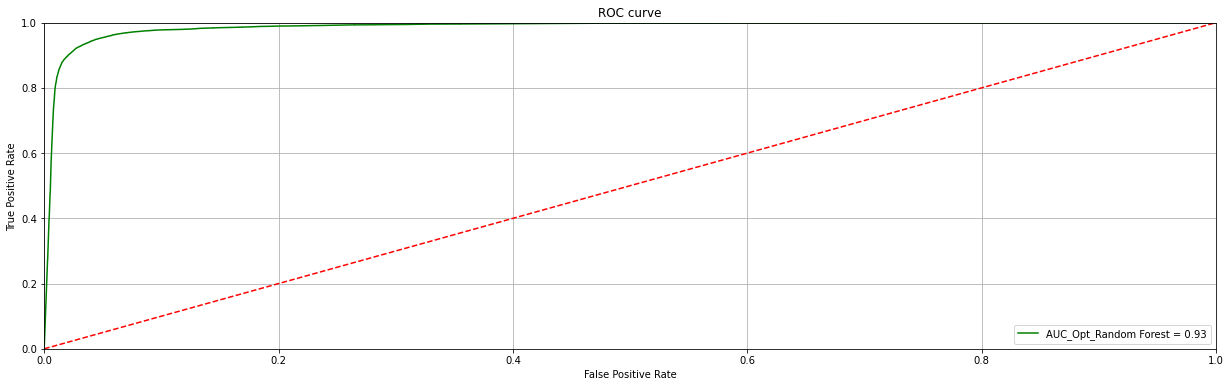

In [38]:
rf = forest.fit(X_train, y_train.values.ravel()) 
rf_predicted_label_r = rf.predict_proba(X_test)
fig, axList = plt.subplots(ncols=1)
fig.set_size_inches(21,6)

ax = axList
def plot_auc(y, probs):
    fpr, tpr, threshold = roc_curve(y, probs[:,1])
    auc = roc_auc_score(y_test, rf_predicted_labels)
    ax.plot(fpr, tpr, color = 'green', label = 'AUC_Opt_Random Forest = %0.2f' % auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.legend(loc = 'lower right')
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[0, 1], ylim=[0, 1],
           title='ROC curve') 
    
plot_auc(y_test, rf_predicted_label_r);
ax.grid(True)

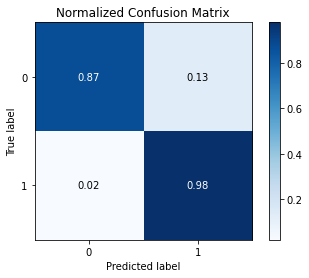

In [289]:
skplt.metrics.plot_confusion_matrix(y_test, rf_predicted_labels, normalize=True)
plt.show()

# Logistic Regression

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import plotnine as p9
from scipy import stats

In [43]:
X = df.iloc[:,1:22]  # independent columns - features
y = df.iloc[:,0]    # target column - Diabetes_012

In [44]:
# Split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [45]:
log_reg_full = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
log_reg_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Diabetes_012   No. Observations:               174334
Model:                            GLM   Df Residuals:                   174313
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59639.
Date:                Mon, 05 Dec 2022   Deviance:                   1.1928e+05
Time:                        17:50:25   Pearson chi2:                 1.61e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1247
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighBP                   0.9031      0.017     52.370      0.000       0.869       0.937
HighChol                 0.6289      0.016     39.397      0.000       0.598       0.660
CholCheck               -1.0161      0.034    -30.124      0.000      -1.082      -0.950
BMI                      0.0218      0.001     22.620      0.000       0.020       0.024
Smoker                  -0.1800      0.015    -11.723      0.000      -0.210      -0.150
Stroke                   0.1231      0.030      4.048      0.000       0.064       0.183
HeartDiseaseorAttack     0.4136      0.021     19.380      0.000       0.372       0.455
PhysActivity            -0.2627      0.016    -16.065      0.000      -0.295      -0.231
Fruits                  -0.0938      0.016     -5.912      0.000      -0.125      -0.063
Veggies                 -0.1982      0.018    -11.048      0.000      -0.233      -0.163
HvyAlcoholConsump       -0.9163      0.046    -19.986      0.000      -1.006      -0.826
AnyHealthcare           -0.6777      0.030    -22.229      0.000      -0.737      -0.618
NoDocbcCost             -0.4087      0.027    -15.226      0.000      -0.461      -0.356
GenHlth                  0.2493      0.009     28.845      0.000       0.232       0.266
MentHlth                -0.0091      0.001     -9.000      0.000      -0.011      -0.007
PhysHlth                 0.0013      0.001      1.440      0.150      -0.000       0.003
DiffWalk                 0.2930      0.020     14.566      0.000       0.254       0.332
Sex                      0.1360      0.016      8.725      0.000       0.105       0.167
Age                      0.0214      0.003      7.502      0.000       0.016       0.027
Education               -0.3207      0.007    -44.312      0.000      -0.335      -0.307
Income                  -0.0929      0.004    -23.157      0.000      -0.101      -0.085
========================================================================================
"""

In [46]:
# drop PhysHlth
X  = X.drop(['PhysHlth'], axis=1)

In [47]:
# Split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [49]:
log_reg_red = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
log_reg_red.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Diabetes_012   No. Observations:               174334
Model:                            GLM   Df Residuals:                   174314
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59640.
Date:                Mon, 05 Dec 2022   Deviance:                   1.1928e+05
Time:                        17:51:12   Pearson chi2:                 1.61e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1246
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
HighBP                   0.9028      0.017     52.359      0.000       0.869       0.937
HighChol                 0.6289      0.016     39.402      0.000       0.598       0.660
CholCheck               -1.0175      0.034    -30.189      0.000      -1.084      -0.951
BMI                      0.0216      0.001     22.577      0.000       0.020       0.024
Smoker                  -0.1799      0.015    -11.717      0.000      -0.210      -0.150
Stroke                   0.1242      0.030      4.086      0.000       0.065       0.184
HeartDiseaseorAttack     0.4144      0.021     19.431      0.000       0.373       0.456
PhysActivity            -0.2644      0.016    -16.222      0.000      -0.296      -0.232
Fruits                  -0.0935      0.016     -5.893      0.000      -0.125      -0.062
Veggies                 -0.1981      0.018    -11.046      0.000      -0.233      -0.163
HvyAlcoholConsump       -0.9171      0.046    -20.006      0.000      -1.007      -0.827
AnyHealthcare           -0.6774      0.030    -22.223      0.000      -0.737      -0.618
NoDocbcCost             -0.4081      0.027    -15.208      0.000      -0.461      -0.356
GenHlth                  0.2537      0.008     31.336      0.000       0.238       0.270
MentHlth                -0.0088      0.001     -8.901      0.000      -0.011      -0.007
DiffWalk                 0.3008      0.019     15.532      0.000       0.263       0.339
Sex                      0.1359      0.016      8.718      0.000       0.105       0.166
Age                      0.0212      0.003      7.447      0.000       0.016       0.027
Education               -0.3207      0.007    -44.318      0.000      -0.335      -0.307
Income                  -0.0931      0.004    -23.208      0.000      -0.101      -0.085
========================================================================================
"""

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Predict responses 
rf_classifier_name = ["Logistic Regression"]
pred = log_reg_red.predict(X_test)
predictions = list(map(round, pred))

print("Classification Report for ",rf_classifier_name, " :\n ",
      metrics.classification_report(y_test, predictions))
#print(classification_report(y_test,predictions))
# Accuracy score
print('\nTest accuracy = ', accuracy_score(y_test, predictions))

Classification Report for  ['Logistic Regression']  :
                precision    recall  f1-score   support

           0       0.87      0.97      0.92     64133
           1       0.47      0.14      0.22     10582

    accuracy                           0.86     74715
   macro avg       0.67      0.56      0.57     74715
weighted avg       0.82      0.86      0.82     74715


Test accuracy =  0.8560128488255371


[[62427  1706]
 [ 9052  1530]]


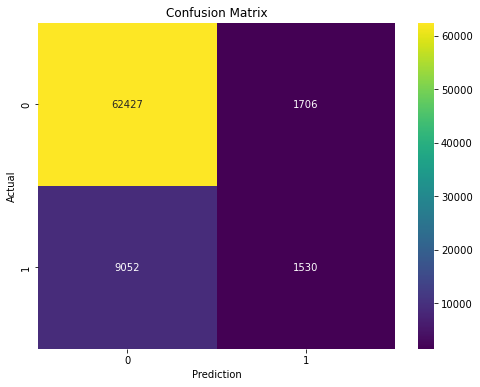

In [67]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, predictions)
print(matrix)
#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = ".0f", cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

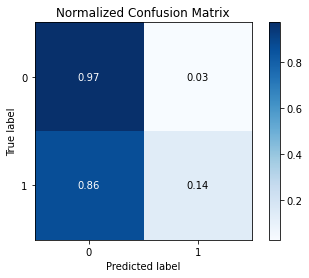

In [65]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

/Users/williecheng/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


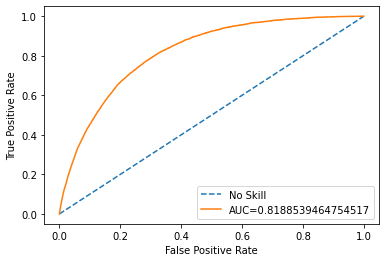

In [198]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)


#print ('accuracy_score =%.3f' %(acc))

#create ROC curve
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()